In [22]:
import sklearn as sk
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [23]:
# diabetes_bunch = load_diabetes()

# Load the dataset with features (X) and target (y) as NumPy arrays
X, y = sk.datasets.load_diabetes(return_X_y=True)

# Load the dataset as a pandas DataFrame for easier analysis
# Requires scikit-learn version >= 0.23
# diabetes_df = load_diabetes(as_frame=True)
# X_df = diabetes_df.data
# y_df = diabetes_df.target


print(X)
print(y)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

In [24]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# Second split: Validation 20%, Test 20%
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

In [25]:


print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (442, 10)
Target shape: (442,)


In [26]:
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

In [27]:
import itertools
import functools
import numpy as np


def polynomial_transform(x, degree):
    """
    Performs transformation of input x into degree-d polynomial features.

    Arguments:
        x (array-like): Data of shape (n,)
        degree (int): Degree of polynomial

    Returns:
        np.ndarray: Polynomial transformation of x
    """
    if x.ndim == 1:
        x = x[:, None]

    x_t = x.T
    features = [np.ones(len(x))]

    for d in range(1, degree + 1):
        for items in itertools.combinations_with_replacement(x_t, d):
            features.append(
                functools.reduce(lambda a, b: a * b, items)
            )

    return np.asarray(features).T



In [28]:
X_train = polynomial_transform(X_train,3)
X_val = polynomial_transform(X_val,3)
X_test = polynomial_transform(X_test,3)

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel trained!")


Model trained!


In [30]:
y_val_pred = model.predict(X_val)
y_train_pred = model.predict(X_train)

val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("\n--- Validation Results ---")
print("Validation MSE:", val_mse)
print("Validation R²:", val_r2)
print("\n")
print("Train MSE:", train_mse)
print("Train R²:", train_r2)




--- Validation Results ---
Validation MSE: 10674513.670904303
Validation R²: -1850.6334670544882


Train MSE: 2.2020818277465522e-17
Train R²: 1.0


In [31]:
y_val_pred = model.predict(X_val)
y_train_pred = model.predict(X_train)


val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("\n--- Validation Results ---")
print("Validation MSE:", val_mse)
print("Validation R²:", val_r2)
print("\n")
print("Train MSE:", train_mse)
print("Train R²:", train_r2)




--- Validation Results ---
Validation MSE: 10674513.670904303
Validation R²: -1850.6334670544882


Train MSE: 2.2020818277465522e-17
Train R²: 1.0


In [32]:
y_pred = model.predict(X_test)
print(y_pred)

[   -35.60592283    302.03619009  -1591.78600075   2230.63819703
  -2174.64916873  -1199.54942306   -808.83639304   -473.50911722
   2709.2497396    -454.2851629     283.30909306    577.10953817
   -187.43594079   -682.09719133   -232.5557751   -8693.86206425
  -3408.20726264    161.3823548    1932.52047163    919.43949464
  -3647.65980725  -1222.17259261    256.5394952    1320.79611037
    454.09483945    220.14915707    279.66932522  -4765.26331538
     61.32819189    713.13855246    236.11916035  -1031.37903762
  -1521.48739041   -156.91270933  -2565.8564704   -2210.35955982
    272.87433398  -5946.08425212    -88.2515595    3080.81107923
    645.66294049  -2472.57962519    -31.80754227    969.68420094
   5262.82172024  -4220.73012915    144.28589911   2344.64119268
   5304.15016273   1257.14870484   4111.89044921   -546.39998533
   1971.70014556   1653.97857481   2150.97667338    314.58544253
    947.81175279     71.98834153   -429.03269158   1010.27816057
   4155.40815319  -7803.3

In [33]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Evaluation ---")
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)
print("\nCoefficients/weights:", model.coef_)
print("Intercept/Bias:", model.intercept_)


--- Evaluation ---
Mean Squared Error (MSE): 10151709.47470659
R² Score: -1753.9804352310357

Coefficients/weights: [-5.87557871e+00 -5.47648927e+05  1.04191816e+06 -6.66611163e+05
 -4.02750531e+05  6.64537820e+05  1.22161499e+06  1.84306498e+05
  4.17010220e+04 -6.35824768e+05  1.12688654e+06  5.80160086e+04
  6.33125358e+03  3.94476802e+04 -7.90716254e+04 -1.26288603e+08
  1.10730225e+08  4.77788203e+07  4.52748734e+05  4.15532475e+07
 -7.80925460e+04  6.29168546e+03  1.86226960e+05  6.16888278e+04
  2.38871887e+08 -2.09733843e+08 -8.94170990e+07 -6.48019927e+04
 -7.88093049e+07  4.88364868e+01  1.34616203e+04  1.01782582e+05
 -1.54129009e+08  1.35609489e+08  5.73579119e+07 -1.86829456e+05
  5.05129129e+07 -1.04678477e+05  2.38105748e+04 -9.34271440e+07
  8.20211893e+07  3.47858092e+07 -1.98171964e+05  3.07354458e+07
  9.20774536e+03  2.42389389e+08 -1.23998263e+07 -8.15127033e+07
  1.38278549e+07 -2.55351012e+08  2.59770473e+08 -1.76168381e+08
 -8.31383277e+07 -1.25176075e+07  8.83

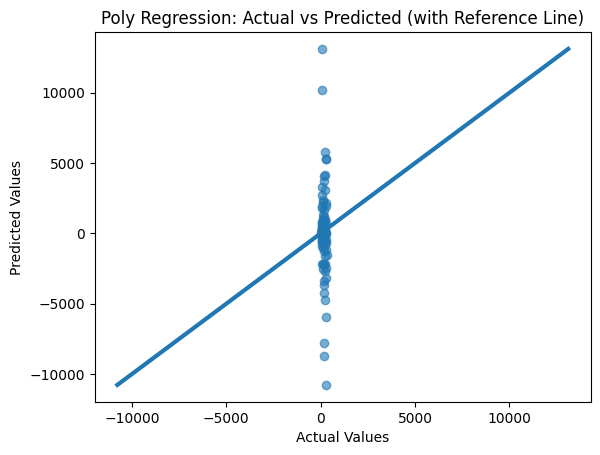

In [34]:
plt.scatter(y_test, y_pred, label="Predicted", alpha=0.6)

# Draw 45-degree reference line (perfect prediction)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

plt.plot([min_val, max_val], [min_val, max_val], linewidth=3)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Poly Regression: Actual vs Predicted (with Reference Line)")
plt.show()


Training results
Train MSE: 2.2020818277465522e-17
Train R²: 1.0

--- Validation Results ---
Validation MSE: 10674513.670904303
Validation R²: -1850.6334670544882

 Testing result

--- Evaluation ---
Test  (MSE): 10151709.47470659
Test R² Score: -1753.9804352310357


<BarContainer object of 3 artists>

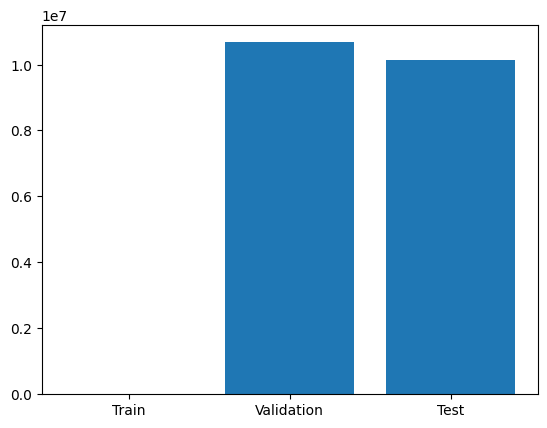

In [35]:
y_val_pred = model.predict(X_val)
y_train_pred = model.predict(X_train)

val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



print("\nTraining results")
print("Train MSE:", train_mse)
print("Train R²:", train_r2)


print("\n--- Validation Results ---")

print("Validation MSE:", val_mse)
print("Validation R²:", val_r2)

print("\n Testing result")

print("\n--- Evaluation ---")
print("Test  (MSE):", mse)
print("Test R² Score:", r2)

plt.bar(
    ["Train", "Validation", "Test"],
    [train_mse, val_mse, mse]
)



In [36]:
X_train_poly = polynomial_transform(X_train,2)
X_test_poly = polynomial_transform(X_test,2)
X_val_poly = polynomial_transform(X_val,2)
print(X_train)
print("\n")
print(X_train_poly)


model = LinearRegression()

model.fit(X_train_poly, y_train)


print("\n Poly Model trained!")

[[ 1.00000000e+00 -1.27796319e-02 -4.46416365e-02 ...  3.55214696e-05
   3.64614155e-06  3.74262337e-07]
 [ 1.00000000e+00  6.71362140e-02 -4.46416365e-02 ...  2.07673306e-04
   9.92603846e-05  4.74429002e-05]
 [ 1.00000000e+00  6.35036756e-02  5.06801187e-02 ...  2.89406420e-05
   1.47988741e-05  7.56744351e-06]
 ...
 [ 1.00000000e+00  3.08108295e-02 -4.46416365e-02 ... -1.28117622e-07
  -1.26633831e-08 -1.25167226e-09]
 [ 1.00000000e+00 -1.27796319e-02 -4.46416365e-02 ... -5.67352478e-05
  -5.65832186e-05 -5.64315968e-05]
 [ 1.00000000e+00 -9.26954778e-02 -4.46416365e-02 ... -2.84966023e-08
  -5.97230328e-09 -1.25167226e-09]]


[[ 1.00000000e+00  1.00000000e+00 -1.27796319e-02 ...  1.32943482e-11
   1.36461346e-12  1.40072297e-13]
 [ 1.00000000e+00  1.00000000e+00  6.71362140e-02 ...  9.85262395e-09
   4.70920052e-09  2.25082878e-09]
 [ 1.00000000e+00  1.00000000e+00  6.35036756e-02 ...  2.19006673e-10
   1.11989643e-10  5.72662013e-11]
 ...
 [ 1.00000000e+00  1.00000000e+00  3.08108

In [37]:
y_pred = model.predict(X_test_poly)
print(y_pred)

y_val_pred = model.predict(X_val_poly)
y_train_pred = model.predict(X_train_poly)

val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



print("\nTraining results")
print("Train MSE:", train_mse)
print("Train R²:", train_r2)


print("\n--- Validation Results ---")

print("Validation MSE:", val_mse)
print("Validation R²:", val_r2)

print("\n Testing result")

print("\n--- Evaluation ---")
print("Test  (MSE):", mse)
print("Test R² Score:", r2)


[ 348.6216468  -142.83084845  -48.32367422  115.49485472  173.85194498
  432.33630514  784.33212538  182.87451267  415.90167033  -12.35605947
   91.37466641  234.42360882 -548.69205734   85.61967618  -53.03606481
  319.1439334   -14.87181237  238.34598579  349.91704284  169.97595679
 1238.68805165 -140.80593168  198.94085005  458.60383698  -68.42985277
  233.98246663  -76.70204235  526.11193777    9.53191501   70.64789556
  133.76027587  211.31010856 1599.51179047  955.32015161  804.40313395
  320.61272471  191.8887634   346.28884682  287.89227375   17.3887107
  195.85326829 -218.19889328  530.72540128  492.64127351 1381.84913639
 -194.16080828  102.23656249  475.07988525 1259.47353856  283.26810965
  577.53395723  167.51907066  186.42048539  397.02199845  435.29983505
  127.49984485  271.71134598 -117.67720306  421.30062968  437.03468269
 -177.52402174  401.55324401 -235.77199112  273.09774484 1012.10725525
 -614.62606907  347.97982745  158.27922169  113.25513185 -315.63447484
  164.8

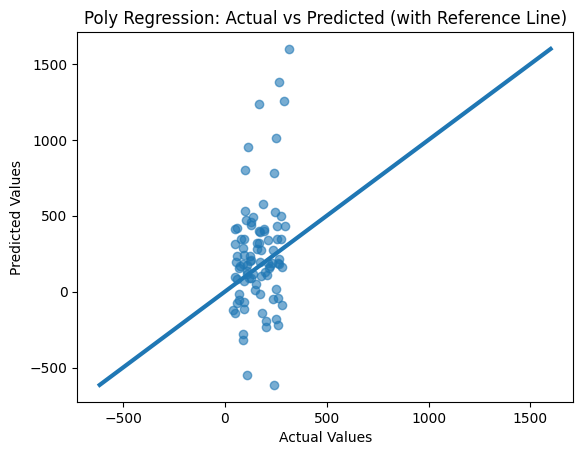

In [38]:
plt.scatter(y_test, y_pred, label="Predicted", alpha=0.6)

# Draw 45-degree reference line (perfect prediction)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

plt.plot([min_val, max_val], [min_val, max_val], linewidth=3)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Poly Regression: Actual vs Predicted (with Reference Line)")
plt.show()

<BarContainer object of 3 artists>

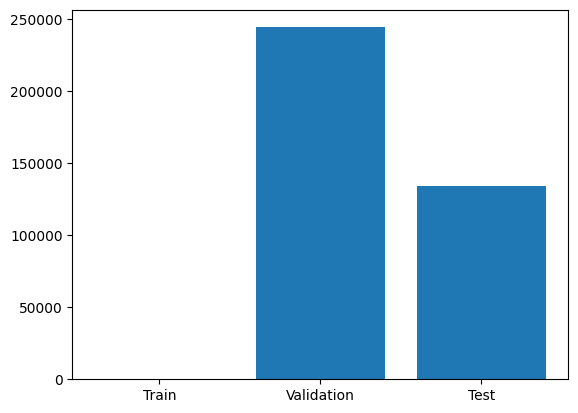

In [39]:
plt.bar(
    ["Train", "Validation", "Test"],
    [train_mse, val_mse, mse]
)